# Pairwise Alignment

This is a pairwise alignment project that takes two DNA sequences as input (fasta or text files), as well as match, mismatch, and gap values, and outputs the alignment of the sequences as well as the score of best global alignment and identity score. Finally, visualize the alignment. 

This project was implemented using object-oriented programming in Python to construct a class with seven functions, each of which serves a distinct purpose. The Needleman-Wunsch method was used to identify the best global alignment between the two sequences. This program requires the following packages to run: re, numpy, matplotlib.pyplot, pandas, and IPython.display. 



In [1]:
class PANW():
    
    def __init__(self, seq1, seq2 , match, mismatch, gap):
        
        """ 
        Instance attributes: The init method was used to generate the first and second sequences (seq1, seq2),
        as well as the match, mismatch, and gap.
        """ 
        self.seq1 = seq1
        self.seq2 = seq2
        self.match = match
        self.mismatch = mismatch
        self.gap = gap
      
    
    def sequence (self):
        
        """
       Function 1: open the files and, if the file is a fasta file, separate the
       information from the sequence and store the sequences in two objects (S1 and S2). The length of the 
       defined sequences is then determined and store in two objects called L1 and L2.
       To prevent repeating these lines for the following function, the outputs of this function
       will return.
       
       input:seq1 and seq2
       output: S1,S2,L1,L2
       
        """
       
        s1=''
        s2=''
        seq1_info=[]
        seq2_info=[]
        
        with open (self.seq1) as f1, open (self.seq2) as f2 :
      
            for line in f1 :
                if re.match(">",line):
                    seq1_info.append(line)
                else:    
                    s1+=line.rstrip()
                    L1 =len(s1)
                        
            for line in f2:
                if re.match(">",line):
                    seq2_info.append(line)
                else:    
                    s2+=line.rstrip() 
                    L2=len(s2)
                    
        return s1,s2,L1,L2
    
    
    def NeedlemanWunsch (self):
        
        """
        Function 2: First takes the outputs of the previous function, then constructs a
        matrix depending on the length of the sequences. afterward adds the gap value sequentially into 
        the first column and row of the matrix. Finally, by comparing each nucleotide of two sequences based on 
        similarity the score for each above, left, and diagonal cell are computed and compared, then the highest
        score is added to the matrix.
        
        input: output of Function 1
        output: matrix 
        
        
        """
        s1,s2,L1,L2 = self.sequence()
        matrix = []
        
        for y in range (L2+1):
            matrix.append([])
            for x in range (L1+1):
                matrix[-1].append(0)

        for x in range(0,L1+1):
            matrix[0][x]= x*int(self.gap)
        for y in range(0, L2+1):
            matrix[y][0]= y*int(self.gap)
   
    
        for y in range (1,L2+1):
            for x in range (1,L1+1):
                if s1[x-1]==s2[y-1]:
                    
                    M = matrix[y-1][x-1]+ int(self.match)
                    D = matrix[y-1][x-1]+int(self.gap)
                    I = matrix[y][x-1]+int(self.gap) 
                    matrix[y][x]= max(M,D,I)
                    

                else:
              
                    M = matrix[y-1][x-1]+int(self.mismatch)
                    D = matrix[y-1][x]+int(self.gap)
                    I = matrix[y][x-1]+int(self.gap)
                    matrix[y][x]= max(M,D,I)
         
   
        return matrix
  
     
    def scoretrack_Align(self):
        
        """
       Function 3: find the score of best alignmnet which is located in the bottom right cell of the matrix, then 
       track it down to find the best alignment, and then reverse the alignment (A1 and A2). Calculate the number
       of matches in the alignment by creating a variable called match count that is set to zero. Finally, compute
       the similarity score of two alignments.
       
       input: the ouptput of function 1 and 2
       output: A1,A2,match_count,best_score,Identities
       
        """
        matrix = self.NeedlemanWunsch()
        s1,s2,L1,L2 = self.sequence()
        # A1 and A2 is created and the alignment will store in these two variable for s1 and s2 
        A1 = ""
        A2 = ""
    
  
        #To find the best score which is in the last cells of the matrix
      
        x = L1
        y = L2
         
        best_score = matrix[y][x]
        match_count=0
         
        # create four  variable and used them in the while loop as a pointer to find out from which cell
        #the score comes and trace back the score to find the best alignment and fill out the A1 and A2
        #for the two original sequences S1 and S2, with gaps added to them in this step
        
        while y>0 and x>0 :
            
            current_s = matrix[y][x]
            left_s = matrix[y][x-1]
            diagonald_s = matrix[y-1][x-1]
            up_s = matrix[y-1][x]

            
            if  s1[x-1]==s2[y-1]:
                if current_s == diagonald_s +int(self.match):
                    A1 = A1+s1[x-1]
                    A2 = A2+s2[y-1]
                    y = y-1
                    x = x-1
                    match_count+=1
                    
                if current_s == left_s +int(self.gap):
                    A1= A1+s1[x-1]
                    A2 = A2+'-'
                    x = x-1
                
                if current_s== up_s +int(self.gap):
                    A1 = A1+'-'
                    A2 = A2+s2[y-1]
                    y = y-1
                    
       
            else:
                if current_s == diagonald_s + int(self.mismatch):
                    A1 = A1+s1[x-1]
                    A2 = A2+s2[y-1]
                    y = y-1
                    x = x-1   
                if current_s == left_s + int(self.gap):
                    A1= A1+s1[x-1]
                    A2 = A2+'-'
                    x = x-1
                
                if current_s== up_s + int(self.gap):
                    A1 = A1+'-'
                    A2 = A2+s2[y-1]
                    y = y-1
                 
        while x > 0:
            A1 = A1+ s1[x-1]
            A2 = A2+'-'
            x = x-1
            
        while y > 0:
            A1 = A1 + '-'
            A2 = A2+ s2[y-1]
            y = y-1
        
        # reverse alignments
        A1 = A1[::-1]
        A2 = A2[::-1] 
        
        # calculate the smilarity score between two sequence
        if L1==L2:
            Identities= ((2*match_count)/(L1+L2))*100
        if L1< L2:
            Identities= (match_count/L2)*100
        if L1> L2:
            Identities= (match_count/L1)*100
        
    
        return A1,A2,match_count,best_score,Identities
    
    def symbol(self):
        
        """
        Function 4: Takes the output of function 3 as input and generate an object called symbol.
        compares each element of two alignments and fills the symbol's object based on similarity.
        This function returns the symbol and length of the alignment, which will be utilized in the next function. 
        
        input: output of function 3
        output: symbol,L_Align
    
        
        """
        A1,A2,match_count,best_score,Identities = self.scoretrack_Align()
        symbol=''
        
        L_Align=len(A1)
      
        
        for i in range(L_Align):
            if A1[i]==A2[i]:
                symbol += '|'
            elif A1[i]=='-' or A2[i]=='-':
                symbol+= ' '
            else:
                symbol+= '*'
                
        return symbol,L_Align
    
    def demo_alignment(self):
        """
       Function 5: prints the score of the best global alignment as well as the alignment of these
       two sequences and Identities.
       
       inputs: output of function 1,3 and 4
       outputs: prints the score of the best global alignment as well as the alignment of these
       two sequences and Identities
       
        """
        
        symbol,L_Align = self.symbol()
        s1,s2,L1,L2 = self.sequence()
        A1,A2,match_count,best_score,Identities = self.scoretrack_Align()   
        
        
        if  L1==L2:
            
            print(" Needleman–Wunsch algorithm"," \n","Score of the best global alignment is:",
                   best_score ,"   ", "Identities:",match_count,"/",L1,"(",round(Identities,2),"%)" ,"\n")
        if L1< L2:
            print(" Needleman–Wunsch algorithm"," \n","Score of the best global alignment is:",
                   best_score ,"   ", "Identities:",match_count,"/",L2,"(",round(Identities,2),"%)" ,"\n")
        if L1> L2:
            print(" Needleman–Wunsch algorithm"," \n","Score of the best global alignment is:",
                   best_score ,"   ", "Identities:",match_count,"/",L1,"(",round(Identities,2),"%)" ,"\n")
        
        s = 0
        e = 80
        L = (L_Align//e) + 1
        for i in range (L):
            
            print('DNA_seq1 :',A1[s:e] + "\n" '          ',symbol[s:e] +"\n"+'DNA_seq2 :' ,A2[s:e])
          
            e = e +80
            s = s +80
            
    
    def plot(self):
        
        """
        Function 6: Convert the outputs of the demo alignment function to a list, then construct an object named
        Data as an input to the table we'll create later. create a dataframe with our data and store it as an csv 
        file for vizualisation. Define the color for each nucleotide in the for loop, as well as the color for 
        similarity, gap, and mismatch.
        
        inputs: outputs of function 3
        output: plot
        
        """
        
        A1,A2,match_count,best_score,similarity_score = self.scoretrack_Align()
      
        #conver to a list
        L_A1 = list(A1)
        L_A2 = list(A2)
        
        #prepare data for table
        Data = [L_A1, L_A2]
        
        #
        df = pd.DataFrame(data=Data)
  
        df.to_csv('result.csv', index= None)
        
  
        #Making the fig and ax variables subplots()
        Fig,Axis = plt.subplots(figsize=(20,2))
        #modify the main plot
        plt.subplots_adjust(bottom=0.3)
        
        # set Title and ylable 
        Axis.set(ylabel='seq2    seq1')
        Axis.set_xticks([])
        Axis.set_yticks([])
        Axis.set_title('Pairwise Alignment (Needleman–Wunsch algorithm)')
        

        # Make a table with our data
        table = Axis.table(cellText=Data, loc="center", cellLoc="center", bbox=[0,0,1,1])
        
        for (row, col), cell in table.get_celld().items():
            if (row == 0):
                if L_A1[col] == 'G':
                    c = 'yellow'
                elif L_A1[col] == 'T':
                    c = 'orangered'
                elif L_A1[col] == 'C':
                    c = 'deepskyblue'
                elif L_A1[col] == 'A':
                    c = 'springgreen'
                elif L_A1[col] == '-': 
                    c = 'white'
                cell.set_edgecolor(c)
                cell.set_facecolor(c)
                
            elif (row == 1):
                if L_A2[col] == 'G':
                    c = 'yellow'
                elif L_A2[col] == 'T':
                    c = 'orangered'
                elif L_A2[col] == 'C':
                    c = 'deepskyblue'
                elif L_A2[col] == 'A':
                    c = 'springgreen'
                elif L_A2[col] == '-': 
                    c = 'white'
                cell.set_edgecolor(c)
                cell.set_facecolor(c) 
                
    def scroll_plot (self): 
        
        """
     Function 7: To visualize the output, use the CSV file saved in function 6.display and HTML functions from
     IPython.display package was used.
     The coloring() function defined the color of each dataframe cell based on the nucleotide or gap.
     
     input: CSV file
     output: scroll plot
     """

        df = pd.read_csv('result.csv', sep=",")
        df = df.rename (index = {0:DNA_seq1, 1:DNA_seq2})
        
        print("Pairwise Alignment (Needleman–Wunsch algorithm)")

        def coloring(val):
            if val == 'G':
                color = 'yellow'
            elif val == 'T':
                color = 'orangered'
            elif val == 'C':
                color = 'deepskyblue'
            elif val == 'A':
                color = 'springgreen'
            elif val == '-': 
                color = 'white'
            else:
                color ='white'

            return f"background-color: {color}"

        display(HTML(df.style.applymap(coloring).to_html()))
        
                

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from IPython.display import display, HTML

DNA_seq1= input("uplode first file containing a nucleotide sequence in FASTA or txt format: ")
DNA_seq2= input("uplode second file containing a nucleotide sequence in FASTA or txt format: ")
match =input("input match value:")
mismatch =input("input mismatch:")
gap= input("input gap value:")
#s1.txt
#s2.txt
#bronchitisvirus_strainD1466.fasta
#bronchitisvirus_strainV1397.fasta

data = PANW(seq1=DNA_seq1,seq2=DNA_seq2,match=match,mismatch=mismatch, gap=gap)


uplode first file containing a nucleotide sequence in FASTA or txt format: bronchitisvirus_strainD1466.fasta
uplode second file containing a nucleotide sequence in FASTA or txt format: bronchitisvirus_strainV1397.fasta
input match value:5
input mismatch:-3
input gap value:-3


In [3]:
data.demo_alignment()

 Needleman–Wunsch algorithm  
 Score of the best global alignment is: 7573     Identities: 1550 / 1605 ( 96.57 %) 

DNA_seq1 : ATGTGGGCATC-GTTACTGTCAGTAGTGACTCTTTTGTTTGCTTTAAGTGAATGTAGTATAGTAGGTGAAAATTACACAT
           ||||*|||| | ||||||||*||*||||||||||||||*|||||||*|||||||||||||||||||||||||||||||||
DNA_seq2 : ATGTTGGCA-CAGTTACTGTTAGCAGTGACTCTTTTGTCTGCTTTAGGTGAATGTAGTATAGTAGGTGAAAATTACACAT
DNA_seq1 : ACTATTACCAGAGTCAGTTTAGGCCGCCTAATGGCTGGCATAAACATGGTGGAGCCTATCTTGTAACCAATGAAACTGAC
           ||||||||||||||||||||||*||||||||||||||||||||||||||||||||||||||||||***|||||||||||*
DNA_seq2 : ACTATTACCAGAGTCAGTTTAGACCGCCTAATGGCTGGCATAAACATGGTGGAGCCTATCTTGTAGTTAATGAAACTGAT
DNA_seq1 : ATATCCTATAATGGTGTGTCTTGTACTGTGGGTACAATAAAAGGCGGCATTGTCATTAATGAGAGTGCTATATCTTTTGT
           |||||||||*|||*||*|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
DNA_seq2 : ATATCCTATGATGCTGCGTCTTGTACTGTGGGTACAATAAAAGGCGGCATTGTCATTAATGAGAGTGCTATATCTTTTGT
DNA_seq1 : TACAAAAACACCCATTGCTTGGTCAGC-CAACGGCGTTTGCACTA

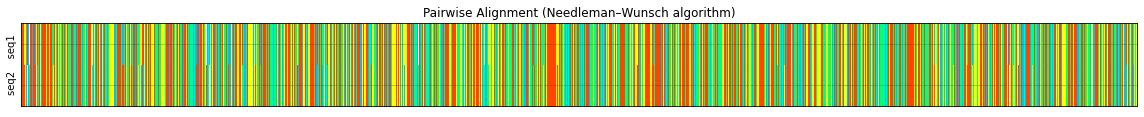

In [4]:
data.plot()

In [5]:
data.scroll_plot()

Pairwise Alignment (Needleman–Wunsch algorithm)


# Evaluation

#### The Bio.pairwise2 module was used to align two short sequences (s1 and s2) and compare the results to PANW.
One of the pairwise2.align.globalms() function outputs for these two sequences is matches the output of PANW and the score of best alignment is 8 . match=5, mismatch=-3, gap=-3


#### Example:

In [7]:
s1='TCGATTA'
s2='CGTGCA'
from Bio.pairwise2 import format_alignment 
from Bio import pairwise2

In [8]:
data = pairwise2.align.globalms(s1,s2,5,-3,-3,-3)

for alignment in data: 
    print(format_alignment(*alignment))

TCGATT-A
 || |. |
-CG-TGCA
  Score=8

TCGAT-TA
 || | .|
-CG-TGCA
  Score=8



In [10]:
data.demo_alignment()

 Needleman–Wunsch algorithm  
 Score of the best global alignment is: 8     Identities: 4 / 7 ( 57.14 %) 

DNA_seq1 : TCGAT-TA
            || | *|
DNA_seq2 : -CG-TGCA


### The demo_alignment() function's runtime was examined using cProfile 
data: bronchitisvirus_strainD1466.fasta and bronchitisvirus_strainV1397.fasta 


In [6]:
import cProfile

In [7]:
cProfile.run('data.demo_alignment()')

 Needleman–Wunsch algorithm  
 Score of the best global alignment is: 7573     Identities: 1550 / 1605 ( 96.57 %) 

DNA_seq1 : ATGTGGGCATC-GTTACTGTCAGTAGTGACTCTTTTGTTTGCTTTAAGTGAATGTAGTATAGTAGGTGAAAATTACACAT
           ||||*|||| | ||||||||*||*||||||||||||||*|||||||*|||||||||||||||||||||||||||||||||
DNA_seq2 : ATGTTGGCA-CAGTTACTGTTAGCAGTGACTCTTTTGTCTGCTTTAGGTGAATGTAGTATAGTAGGTGAAAATTACACAT
DNA_seq1 : ACTATTACCAGAGTCAGTTTAGGCCGCCTAATGGCTGGCATAAACATGGTGGAGCCTATCTTGTAACCAATGAAACTGAC
           ||||||||||||||||||||||*||||||||||||||||||||||||||||||||||||||||||***|||||||||||*
DNA_seq2 : ACTATTACCAGAGTCAGTTTAGACCGCCTAATGGCTGGCATAAACATGGTGGAGCCTATCTTGTAGTTAATGAAACTGAT
DNA_seq1 : ATATCCTATAATGGTGTGTCTTGTACTGTGGGTACAATAAAAGGCGGCATTGTCATTAATGAGAGTGCTATATCTTTTGT
           |||||||||*|||*||*|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
DNA_seq2 : ATATCCTATGATGCTGCGTCTTGTACTGTGGGTACAATAAAAGGCGGCATTGTCATTAATGAGAGTGCTATATCTTTTGT
DNA_seq1 : TACAAAAACACCCATTGCTTGGTCAGC-CAACGGCGTTTGCACTA